In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_path = "/content/drive/MyDrive/CVPR/Dataset/Animals"

for c in os.listdir(data_path):
  print("Category:", c)

  path = os.path.join(data_path, c)
  print("Path:", path)

  class_index = os.listdir(data_path).index(c)
  print("Class index:", class_index)

Category: Jaguar
Path: /content/drive/MyDrive/CVPR/Dataset/Animals/Jaguar
Class index: 0
Category: Cheetah
Path: /content/drive/MyDrive/CVPR/Dataset/Animals/Cheetah
Class index: 1
Category: Lion
Path: /content/drive/MyDrive/CVPR/Dataset/Animals/Lion
Class index: 2
Category: Leopard
Path: /content/drive/MyDrive/CVPR/Dataset/Animals/Leopard
Class index: 3
Category: Tiger
Path: /content/drive/MyDrive/CVPR/Dataset/Animals/Tiger
Class index: 4


Image: pexels-photo-247615.jpeg
Image path: /content/drive/MyDrive/CVPR/Dataset/Animals/Tiger/pexels-photo-247615.jpeg
<class 'numpy.ndarray'>
(400, 500, 3)
Grayscale image shape: (400, 500)


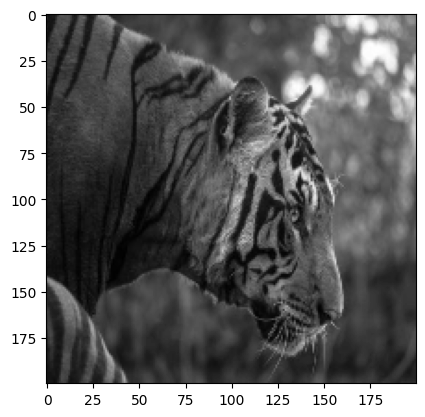

In [3]:
for img in os.listdir(path):
  print("Image:", img)
  img_path = os.path.join(path, img)
  print("Image path:", img_path)

  # Read the image
  img_array = cv2.imread(img_path)
  print(type(img_array))
  print(img_array.shape)

  # Convert image to grayscale
  img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
  print("Grayscale image shape:", img_array_gray.shape)

  # Optionally resize the grayscale image
  img_array_gray = cv2.resize(img_array_gray, (200, 200))

  # Show grayscale image
  plt.imshow(img_array_gray, cmap='gray')
  plt.show()

  break  # Process only the first image of the first category

100%|██████████| 39/39 [00:13<00:00,  2.79it/s]


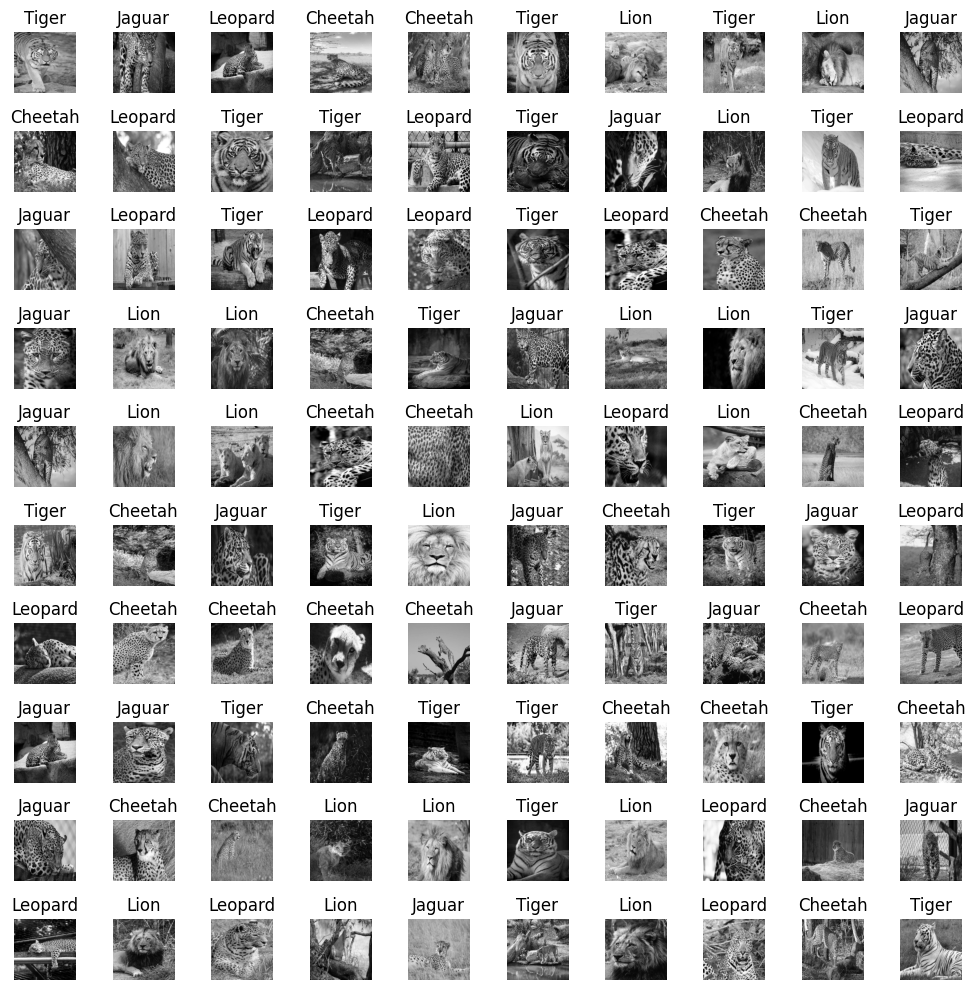

Categories: ['Jaguar', 'Cheetah', 'Lion', 'Leopard', 'Tiger']
Number of images: 170


In [4]:
train_data=[]
categories = os.listdir(data_path)

# Load the dataset
for c in categories:
  path = os.path.join(data_path, c)
  if os.path.isdir(path):
    for img in tqdm(os.listdir(path)):
      img_path = os.path.join(path, img)
      img_array = cv2.imread(img_path)
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      img_array = cv2.resize(img_array, (200, 200))
      train_data.append((img_array, c))

random.shuffle(train_data)

# Get the number of images
num_images = len(train_data)
grid_size = min(num_images, 100)

# Plot the images
plt.figure(figsize=(10, 10))

i = 0
for r in range(10):
    for c in range(10):
        if i >= grid_size:
            break
        plt.subplot(10, 10, i + 1)
        plt.imshow(train_data[i][0], cmap='gray')
        plt.title(train_data[i][1])
        plt.axis('off')
        i += 1

plt.tight_layout()
plt.show()

print("Categories:", categories)
print("Number of images:", num_images)

In [13]:
# Organize the data into 5 folds
fold_size = len(train_data) // 5
folds = [train_data[i*fold_size:(i+1)*fold_size] for i in range(5)]

# Display information about the folds
for i, fold in enumerate(folds):
    print(f"Fold {i+1} has {len(fold)} images")


Fold 1 has 34 images
Fold 2 has 34 images
Fold 3 has 34 images
Fold 4 has 34 images
Fold 5 has 34 images


In [21]:
def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def k_nearest_neighbors(train_images, train_labels, test_image, K):
    distances = [(euclidean_distance(train_img, test_image), label)
                 for train_img, label in zip(train_images, train_labels)]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    nearest_labels = [label for _, label in distances[:K]]
    prediction = max(set(nearest_labels), key=nearest_labels.count)  # Most common label
    return prediction

In [23]:
def cross_validate_k_fold(folds, k_values):
    accuracies = {k: [] for k in k_values}

    for K in k_values:
        for i in range(5):
            # Use fold `i` as validation set, rest as training
            train_folds = [f for j, f in enumerate(folds) if j != i]
            train_data = [img for fold in train_folds for img in fold]
            train_images, train_labels = zip(*train_data)

            test_data = folds[i]
            test_images, test_labels = zip(*test_data)

            correct_predictions = 0
            for test_img, true_label in zip(test_images, test_labels):
                prediction = k_nearest_neighbors(train_images, train_labels, test_img, K)
                if prediction == true_label:
                    correct_predictions += 1
            accuracy = correct_predictions / len(test_labels)
            accuracies[K].append(accuracy)

    return accuracies


Average accuracy for each K:
K = 1: Average Accuracy = 0.26
K = 2: Average Accuracy = 0.22
K = 3: Average Accuracy = 0.21
K = 4: Average Accuracy = 0.25
K = 5: Average Accuracy = 0.22
K = 6: Average Accuracy = 0.21
K = 7: Average Accuracy = 0.22
K = 8: Average Accuracy = 0.25
K = 9: Average Accuracy = 0.24
K = 10: Average Accuracy = 0.21
K = 11: Average Accuracy = 0.24
K = 12: Average Accuracy = 0.22
K = 13: Average Accuracy = 0.25
K = 14: Average Accuracy = 0.22
K = 15: Average Accuracy = 0.24
K = 16: Average Accuracy = 0.22
K = 17: Average Accuracy = 0.21
K = 18: Average Accuracy = 0.19
K = 19: Average Accuracy = 0.18
K = 20: Average Accuracy = 0.21
K = 21: Average Accuracy = 0.22
K = 22: Average Accuracy = 0.21
K = 23: Average Accuracy = 0.21
K = 24: Average Accuracy = 0.21
K = 25: Average Accuracy = 0.22
K = 26: Average Accuracy = 0.21
K = 27: Average Accuracy = 0.21
K = 28: Average Accuracy = 0.21
K = 29: Average Accuracy = 0.21
K = 30: Average Accuracy = 0.22


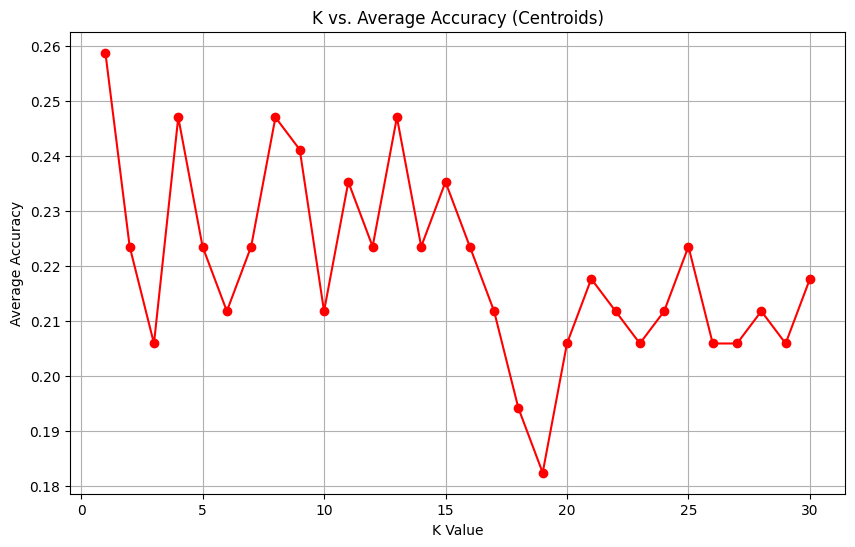

In [27]:
k_values = range(1, 31)
accuracies = cross_validate_k_fold(folds, k_values)

# Calculate and print average accuracy for each K
average_accuracies = {k: np.mean(acc) for k, acc in accuracies.items()}
print("\nAverage accuracy for each K:")
for k, avg_acc in average_accuracies.items():
    print(f"K = {k}: Average Accuracy = {avg_acc:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(average_accuracies.keys()), list(average_accuracies.values()), marker='o', linestyle='-', color='red', markersize=6, markerfacecolor='red')
plt.xlabel('K Value')
plt.ylabel('Average Accuracy')
plt.title('K vs. Average Accuracy (Centroids)')
plt.grid(True)  # Optional: Adds a grid for better visualization
plt.show()